# Project 2 Python
## Wanida Ruangsiriluk
## December 15, 2023

Project Description:  You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary (in USD) will go the farthest with respect to each individual index within the cost_of_living.csv file. Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis. 

#### To begin, first evaluate the salary of data scientist world wide from Levels_Fyi_Salary_Data file and prepare the data to merge with the one from cost_of_living file.  The final table will have salary data and cost of living indices together. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading world wide salary table and filter the title for Data Scientist only and clean up data after string split location column

path = './Levels_Fyi_Salary_Data.csv'
levels_salary_df = pd.read_csv("~/Documents/Github/DSE5002/Project2/Levels_Fyi_Salary_Data.csv")

ww_ds_df = levels_salary_df[levels_salary_df["title"] =='Data Scientist']
ww_ds_df.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/18 14:06,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
440,6/8/18 9:49,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
444,6/8/18 17:55,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
454,6/10/18 19:39,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
495,6/17/18 11:39,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


#### Calculate the statistics of total yearly compensation and group by location.  Other syntax is used to clean up the data because the location format of this dataframe will need to match with the cost of living index dataframe.

In [14]:
loc_salary = ww_ds_df.groupby(
    ['location'])['totalyearlycompensation'].agg([np.median, np.std, np.count_nonzero])
                  
# Need to reset location from being an index                              
loc_salary.reset_index(inplace=True)
loc_salary[["city", "state", "country"]] = loc_salary["location"].str.split(', ', expand=True)
loc_salary['country'] =  np.where(loc_salary['country'].isna(),'United States', loc_salary['country'])

loc_salary = loc_salary.sort_values(by=['median'], ascending=False)
loc_salary.head()

/var/folders/14/1r6k98j90wv9bfq7ymzly7c80000gn/T/ipykernel_12011/3450012275.py:2: FutureWarning: The provided callable <function median at 0x104362ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ['location'])['totalyearlycompensation'].agg([np.median, np.std, np.count_nonzero])
/var/folders/14/1r6k98j90wv9bfq7ymzly7c80000gn/T/ipykernel_12011/3450012275.py:2: FutureWarning: The provided callable <function std at 0x10419af20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ['location'])['totalyearlycompensation'].agg([np.median, np.std, np.count_nonzero])


,location,median,std,count_nonzero,city,state,country
90,"Illinois City, IL",510000.0,NaN,1,Illinois City,IL,United States
102,"Kirkland, WA",505500.0,249336.452743,4,Kirkland,WA,United States
108,"Los Gatos, CA",420000.0,85573.777204,19,Los Gatos,CA,United States
222,"Worcester, MA",375000.0,NaN,1,Worcester,MA,United States
144,"Oakland, CA",350000.0,111504.857891,3,Oakland,CA,United States


#### Cost of living file has location that is different format from salary file, missing state of international countries.  After string split, fill none values of international countries with values from its own state column.  When merging with salary dataframe, both city and country will have to match; otherwise, some city (ie., San Jose) appears twice from different countries.

In [15]:
cflv_df = pd.read_csv("~/Documents/Github/DSE5002/Project2/cost_of_living.csv")
cflv_df = cflv_df.drop(columns=['Rank'])

cflv_df[["city", "state", "country"]] = cflv_df["City"].str.split(', ', expand=True)
cflv_df['country'] = cflv_df['country'].fillna(cflv_df['state'])
cflv_df = cflv_df.rename(columns={'City': 'location'})

cflv_df.head()

,location,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,state,country
0,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43,Hamilton,Bermuda,Bermuda
1,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79,Zurich,Switzerland,Switzerland
2,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53,Basel,Switzerland,Switzerland
3,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40,Zug,Switzerland,Switzerland
4,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96,Lugano,Switzerland,Switzerland


#### Merge both dataframes at city and country and clean up column headings.

In [25]:
merge_df = pd.merge(loc_salary,cflv_df, how = 'inner', on=['city', 'country'])

In [26]:
merge_df = merge_df.drop(columns=['city','state_x','country','location_y','state_y'])
merge_df = merge_df.rename(columns={'location_x': 'location','median': 'median_salary','state_x':'state', 'count_nonzero': 'n'})
merge_df = merge_df[['location', 'median_salary','n','Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index']]


In [27]:
merge_df.head()

,location,median_salary,n,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Oakland, CA",350000.0,3,92.93,87.79,90.52,98.46,78.71,111.73
1,"Berkeley, CA",277000.0,4,94.36,88.22,91.48,106.23,78.85,85.78
2,"San Antonio, TX",257500.0,2,62.59,38.27,51.19,57.25,69.45,137.67
3,"Kansas City, KS",255000.0,1,66.07,33.50,50.80,60.66,75.16,127.20
4,"Kansas City, MO",100000.0,1,66.07,33.50,50.80,60.66,75.16,127.20


In [28]:
merge_df.tail()

,location,median_salary,n,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
100,"Saint Petersburg, SP, Russia",29000.0,1,37.81,17.14,28.12,32.33,36.46,40.77
101,"Sao Paulo, SP, Brazil",28000.0,1,37.51,14.49,26.72,32.13,31.55,29.23
102,"Navi Mumbai, MH, India",27000.0,1,28.38,10.90,20.19,31.59,23.14,78.67
103,"Vienna, WI, Austria",17000.0,1,68.36,34.66,52.56,61.71,66.93,79.56
104,"Pune, MH, India",12000.0,1,27.57,7.12,17.98,28.86,22.75,53.68


#### Evaluate median salary data from all cities against cost of living index.   Cost of living index has already include multiple categories (health care, food and housing, and weighted based on spending patterns and individual budgets [1] ), so it's more preferred to look at this index against salary.

[1] https://www.bankrate.com/real-estate/what-is-cost-of-living/

Slope: 1836.07
Intercept: -5295.77
R-squared value: 0.292
P-value: 0.0
Standard error: 279.78


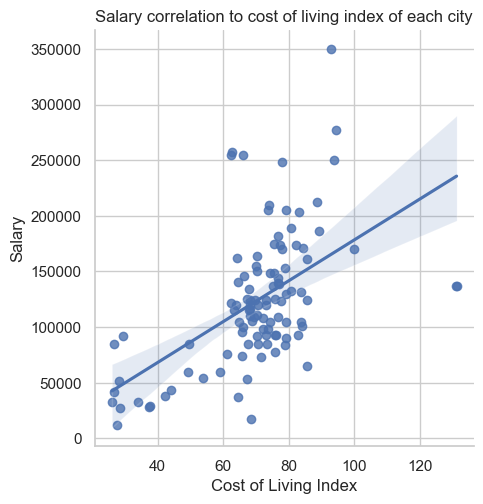

In [30]:
sns.set_theme(style="whitegrid")
g = sns.lmplot(
    data=merge_df,
    x="Cost of Living Index", y="median_salary",
    height=5
)
plt.title('Salary correlation to cost of living index of each city')
plt.ylabel('Salary')

#
# Linear Regression plot
from scipy.stats import linregress
# Extract x and y data from the plot
x_col = merge_df["Cost of Living Index"]
y_sal_med = merge_df["median_salary"]

# Perform linear regression from Scatter plot
slope, intercept, r_value, p_value, std_err = linregress(x_col, y_sal_med)
slope_merge_df = round(slope, 2)
intercept_merge_df = round(intercept, 2)
r_value_merge_df = round(r_value, 2)
p_value_merge_df = round(p_value, 5)
std_err_merge_df = round(std_err, 2)

# Print the results
print(f"Slope: {slope_merge_df}")
print(f"Intercept: {intercept_merge_df}")
print(f"R-squared value: {(r_value_merge_df**2):.3f}")
print(f"P-value: {p_value_merge_df}")
print(f"Standard error: {std_err_merge_df}")

#### From linear regression summary, the slope indicates a positive correlation between cost of living index and salary.  R square value is 0.292 (~29%) which could represent a proportion of the variance in the dependent variable (median salary) can be explained by the independent variable, or cost of living index.

#### Because most cities that have high salary, also have high cost of living index, we need to find a better way to find the best salary and low cost of living index.   In order to compare salary with cost of living index and use this to consider the top 5 cities, we have to normalize salary with cost of living index.  It's basically the salary per cost of living index, which is called 'Affordability index'.

In [32]:
merge_df['Affordability Index'] = merge_df['median_salary'] / merge_df['Cost of Living Index']
aff_index_sorted = merge_df.sort_values(by=['Affordability Index'], ascending=False)
aff_index_sorted.head(10)

,location,median_salary,n,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Affordability Index
2,"San Antonio, TX",257500.0,2,62.59,38.27,51.19,57.25,69.45,137.67,4114.075731
5,"Tulsa, OK",255000.0,1,62.35,28.92,46.68,58.89,60.48,132.05,4089.815557
3,"Kansas City, KS",255000.0,1,66.07,33.50,50.80,60.66,75.16,127.20,3859.542909
0,"Oakland, CA",350000.0,3,92.93,87.79,90.52,98.46,78.71,111.73,3766.275691
7,"Miami, FL",248000.0,2,78.00,64.96,71.88,76.72,79.18,93.71,3179.487179
82,"Hyderabad, AP, India",84500.0,4,26.61,6.47,17.17,29.69,18.17,51.21,3175.497933
75,"Mumbai, MH, India",92000.0,12,29.33,19.72,24.82,29.73,25.17,48.03,3136.720082
1,"Berkeley, CA",277000.0,4,94.36,88.22,91.48,106.23,78.85,85.78,2935.565918
9,"Fremont, CA",210000.0,5,74.12,74.93,74.50,75.40,71.00,157.35,2833.243389
11,"San Jose, CA",205000.0,72,73.71,82.30,77.74,70.53,74.25,157.39,2781.169448


#### Top 5 cities with the highest affordability index are from US:

In [47]:
# subset dataframe for summary and plotting

top5_aff_index = aff_index_sorted.iloc[0:5,]
print(top5_aff_index)

          location  median_salary  n  Cost of Living Index  Rent Index  \
2  San Antonio, TX       257500.0  2                 62.59       38.27   
5        Tulsa, OK       255000.0  1                 62.35       28.92   
3  Kansas City, KS       255000.0  1                 66.07       33.50   
0      Oakland, CA       350000.0  3                 92.93       87.79   
7        Miami, FL       248000.0  2                 78.00       64.96   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
2                           51.19            57.25                   69.45   
5                           46.68            58.89                   60.48   
3                           50.80            60.66                   75.16   
0                           90.52            98.46                   78.71   
7                           71.88            76.72                   79.18   

   Local Purchasing Power Index  Affordability Index  
2                        137.67

#### Plot salary against each index

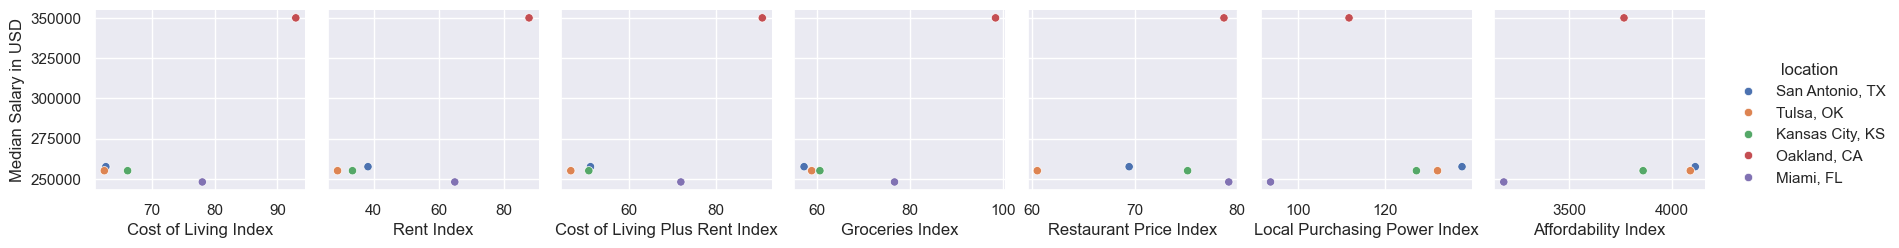

In [35]:
sns.set()
ax=sns.pairplot(data=top5_aff_index,
             x_vars=['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index','Affordability Index'],
             y_vars= ['median_salary'],
             hue = 'location')
ax.set(ylabel='Median Salary in USD')


#### Plot composition of indices of each city

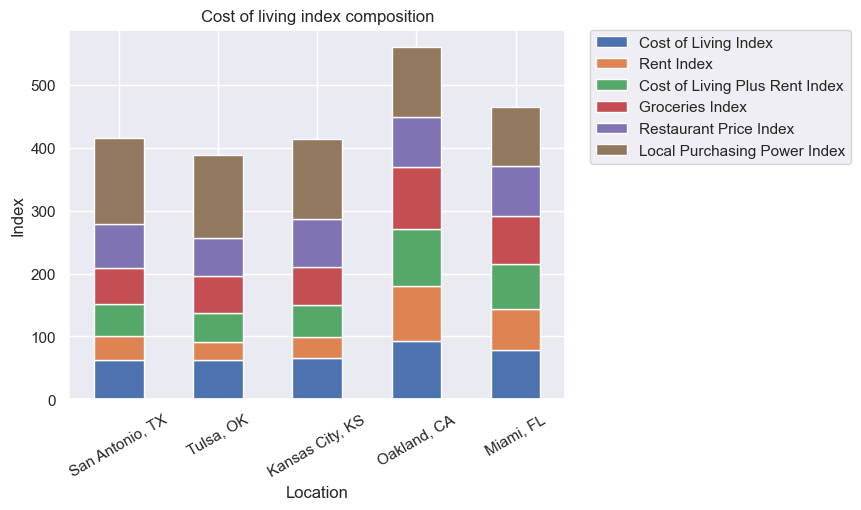

In [36]:
top5_col_index_pl = top5_aff_index[['location','Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index']]
top5_col_index_pl.plot.bar(
    x='location', stacked=True, title='Cost of living index composition',xlabel = 'Location', ylabel = 'Index')                                 
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#### The top 3 cities, San Antonio TX, Tulsa, OK, Kansas City, KS have more local purchasing power index than other indices.   Their  cost of living and rent index are lower than the other two cities.

#### Using available data scientist salary dataset to calculate how much difference the overall data scientist salary compared to the salary from the top 5 cities

In [37]:
salary_df = pd.read_csv("~/Documents/Github/DSE5002/Project2/ds_salaries.csv")
ds_salary = salary_df[(salary_df["job_title"] == 'Data Scientist') &\
                      (salary_df['employment_type'] == 'FT') &\
                          (salary_df['employee_residence'] == 'US')]

In [38]:

ds_salary_summary = ds_salary.groupby('experience_level')['salary_in_usd']\
    .agg([np.mean, np.median, np.std, np.min, np.max])
ds_salary_summary.round(2)

/var/folders/14/1r6k98j90wv9bfq7ymzly7c80000gn/T/ipykernel_12011/2440931363.py:2: FutureWarning: The provided callable <function mean at 0x10419ade0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.mean, np.median, np.std, np.min, np.max])
/var/folders/14/1r6k98j90wv9bfq7ymzly7c80000gn/T/ipykernel_12011/2440931363.py:2: FutureWarning: The provided callable <function median at 0x104362ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg([np.mean, np.median, np.std, np.min, np.max])
/var/folders/14/1r6k98j90wv9bfq7ymzly7c80000gn/T/ipykernel_12011/2440931363.py:2: FutureWarning: The provided callable <function std at 0x10419af20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will

,mean,median,std,min,max
experience_level,,,,,
EN,88833.33,95000.0,17554.68,58000,105000
MI,124488.10,130000.0,30899.89,73000,200000
SE,166796.08,150000.0,53241.53,80000,412000


In [41]:
ds_salary_median = ds_salary['salary_in_usd'].median()
top5_salary_difference = top5_aff_index['median_salary'] - ds_salary_median

print(f'Minimum salary difference: {top5_salary_difference.min()}')
print(f'Maxinimum salary difference: {top5_salary_difference.max()}')


Minimum salary difference: 108000.0
Maxinimum salary difference: 210000.0


#### Plotting salary composition from top 5 cities 

In [46]:
top5_cities_list = list(top5_aff_index['location'])
print(top5_cities_list)

top5_cities = ww_ds_df[ww_ds_df['location'].isin(top5_cities_list)]
top5_cities = top5_cities.sort_values(by='location', ascending=False)

['San Antonio, TX', 'Tulsa, OK', 'Kansas City, KS', 'Oakland, CA', 'Miami, FL']


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Tulsa, OK'),
  Text(1, 0, 'San Antonio, TX'),
  Text(2, 0, 'San Antonio, TX'),
  Text(3, 0, 'Oakland, CA'),
  Text(4, 0, 'Oakland, CA'),
  Text(5, 0, 'Oakland, CA'),
  Text(6, 0, 'Miami, FL'),
  Text(7, 0, 'Miami, FL'),
  Text(8, 0, 'Kansas City, KS')])

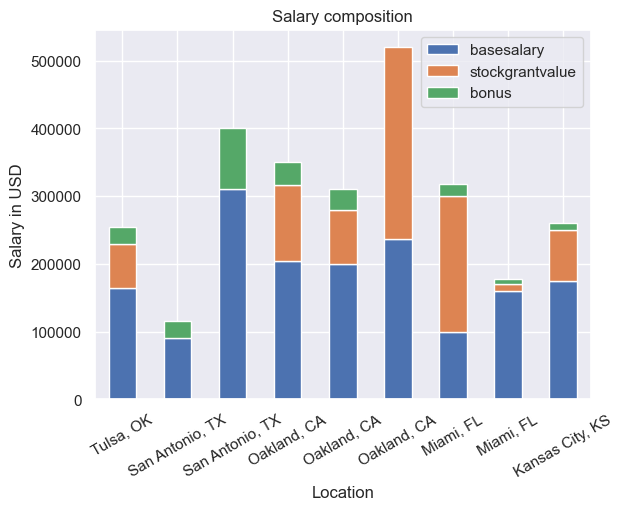

In [45]:
top5_stackpl = top5_cities[['location', 'basesalary','stockgrantvalue', 'bonus']] 
top5_stackpl.plot.bar(
    x='location', stacked=True, title='Salary composition',xlabel = 'Location', ylabel = 'Salary in USD')                                 
plt.xticks(rotation=30)


#### The base salary from San Antonio made up of the most salary, while the position from Oakland showed the stock grant value from made up the most of salary  